## 蒐集Google Trend 數據

In [2]:
import pandas as pd
flu = pd.read_csv('flu.csv', index_col='Date', parse_dates=True)
flu.head()

,cold,flu
Date,,
2004-01-04,32,1
2004-01-11,26,1
2004-01-18,17,1
2004-01-25,26,2
2004-02-01,33,3


## 讀取股價資訊

In [ ]:
! pip install pandas-datareader

In [4]:
from pandas_datareader import data
import datetime
tw9919 = data.get_data_yahoo('9919.TW', 
                                 start=datetime.datetime(2004, 1, 1), 
                                 end=datetime.datetime(2016, 8, 6))

In [5]:
tw9919.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2004-01-01,14.44652,14.44652,14.44652,14.44652,0,8.80669
2004-01-02,14.44652,14.72796,14.25896,14.63418,2379200,8.92109
2004-01-05,14.54029,14.72796,14.44652,14.54029,647700,8.86386
2004-01-06,14.63418,14.72796,14.44652,14.72796,901100,8.97826
2004-01-07,14.72796,14.72796,14.35274,14.35274,573800,8.74952


## 合併股價

In [7]:
tw9919.index = tw9919.index.map(lambda e: e - datetime.timedelta(days=1))
tw9919.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,14.44652,14.44652,14.44652,14.44652,0,8.80669
2004-01-01,14.44652,14.72796,14.25896,14.63418,2379200,8.92109
2004-01-04,14.54029,14.72796,14.44652,14.54029,647700,8.86386
2004-01-05,14.63418,14.72796,14.44652,14.72796,901100,8.97826
2004-01-06,14.72796,14.72796,14.35274,14.35274,573800,8.74952


In [8]:
results = tw9919.merge(flu, left_index=True, right_index=True, how='inner')
results.head()

,Open,High,Low,Close,Volume,Adj Close,cold,flu
Date,,,,,,,,
2004-01-04,14.54029,14.72796,14.44652,14.54029,647700,8.86386,32,1
2004-01-11,14.63418,14.72796,14.44652,14.44652,483200,8.80669,26,1
2004-01-18,14.44652,14.44652,14.44652,14.44652,0,8.80669,17,1
2004-01-25,14.44652,14.44652,14.44652,14.44652,0,8.80669,26,2
2004-02-01,14.82173,15.38461,14.82173,15.19706,2635800,9.26422,33,3


In [9]:
data = results[['Adj Close', 'cold', 'flu']]
data.head()

data.columns = ['tw9919', 'cold', 'flu']
data.head()

,tw9919,cold,flu
Date,,,
2004-01-04,8.86386,32,1
2004-01-11,8.80669,26,1
2004-01-18,8.80669,17,1
2004-01-25,8.80669,26,2
2004-02-01,9.26422,33,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 2004-01-04 to 2016-07-31
Data columns (total 3 columns):
tw9919    649 non-null float64
cold      649 non-null int64
flu       649 non-null int64
dtypes: float64(1), int64(2)
memory usage: 20.3 KB


## 股價視覺化

Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A3F09B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A5D3400>], dtype=object)

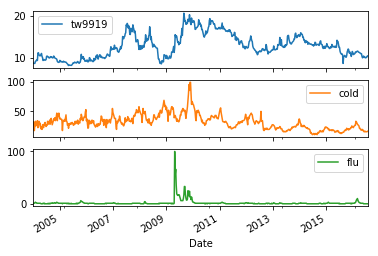

In [11]:
%pylab inline 
data.plot(subplots=True)

## 計算買賣策略

In [12]:
data['cold_mavg'] = pd.rolling_mean(data.cold, 3)
data['flu_mavg'] = pd.rolling_mean(data.flu, 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value 

Populating the interactive namespace from numpy and matplotlib


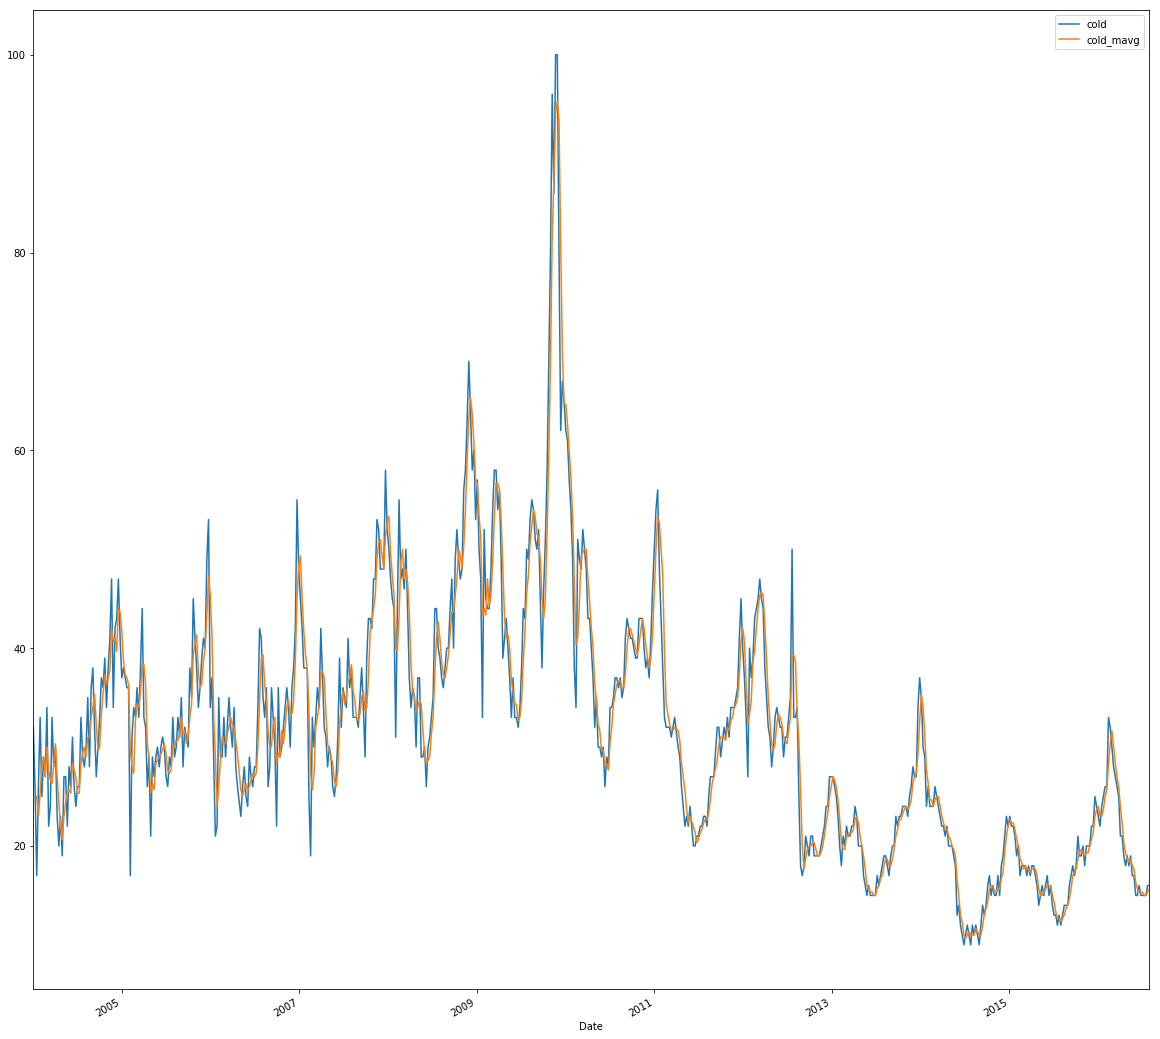

In [13]:
%pylab inline
data[['cold','cold_mavg']].plot(figsize=[20,20])

In [14]:
data['flu_mavg'] = data.flu_mavg.shift(1)
data['cold_mavg'] = data.cold_mavg.shift(1)
data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,tw9919,cold,flu,cold_mavg,flu_mavg
Date,,,,,
2004-01-04,8.86386,32,1,NaN,NaN
2004-01-11,8.80669,26,1,NaN,NaN
2004-01-18,8.80669,17,1,NaN,NaN
2004-01-25,8.80669,26,2,25.000000,1.000000
2004-02-01,9.26422,33,3,23.000000,1.333333
2004-02-08,9.32139,25,2,25.333333,2.000000
2004-02-15,9.55012,29,2,28.000000,2.333333
2004-02-22,9.60729,27,1,29.000000,2.333333
2004-02-29,9.49296,34,1,27.000000,1.666667


In [15]:
data['cold_order'] = 0
# 黃金交叉做多
data['cold_order'][data.cold > data.cold_mavg] = 1 
# 死亡交叉做空
data['cold_order'][data.cold < data.cold_mavg] = -1
data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order
Date,,,,,,
2004-01-04,8.86386,32,1,NaN,NaN,0
2004-01-11,8.80669,26,1,NaN,NaN,0
2004-01-18,8.80669,17,1,NaN,NaN,0
2004-01-25,8.80669,26,2,25.000000,1.000000,1
2004-02-01,9.26422,33,3,23.000000,1.333333,1
2004-02-08,9.32139,25,2,25.333333,2.000000,-1
2004-02-15,9.55012,29,2,28.000000,2.333333,1
2004-02-22,9.60729,27,1,29.000000,2.333333,-1
2004-02-29,9.49296,34,1,27.000000,1.666667,1


In [16]:
data['flu_order'] = 0
# 黃金交叉做多
data['flu_order'][data.flu > data.flu_mavg] = 1 
# 死亡交叉做空
data['flu_order'][data.flu < data.flu_mavg] = -1
data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order
Date,,,,,,,
2004-01-04,8.86386,32,1,NaN,NaN,0,0
2004-01-11,8.80669,26,1,NaN,NaN,0,0
2004-01-18,8.80669,17,1,NaN,NaN,0,0
2004-01-25,8.80669,26,2,25.000000,1.000000,1,1
2004-02-01,9.26422,33,3,23.000000,1.333333,1,1
2004-02-08,9.32139,25,2,25.333333,2.000000,-1,0
2004-02-15,9.55012,29,2,28.000000,2.333333,1,-1
2004-02-22,9.60729,27,1,29.000000,2.333333,-1,-1
2004-02-29,9.49296,34,1,27.000000,1.666667,1,-1


## 計算每週報酬

In [17]:

data['ret_tw9919'] = data.tw9919.pct_change() # 計算每週報酬
data.head()

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order,ret_tw9919
Date,,,,,,,,
2004-01-04,8.86386,32,1,NaN,NaN,0,0,NaN
2004-01-11,8.80669,26,1,NaN,NaN,0,0,-0.006450
2004-01-18,8.80669,17,1,NaN,NaN,0,0,0.000000
2004-01-25,8.80669,26,2,25.0,1.000000,1,1,0.000000
2004-02-01,9.26422,33,3,23.0,1.333333,1,1,0.051953


In [18]:
data['ret_tw9919'] = data['ret_tw9919'].shift(-1)

In [19]:
data['ret_cold'] = data.cold_order * data.ret_tw9919
data.head(10)

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order,ret_tw9919,ret_cold
Date,,,,,,,,,
2004-01-04,8.86386,32,1,NaN,NaN,0,0,-0.006450,-0.000000
2004-01-11,8.80669,26,1,NaN,NaN,0,0,0.000000,0.000000
2004-01-18,8.80669,17,1,NaN,NaN,0,0,0.000000,0.000000
2004-01-25,8.80669,26,2,25.000000,1.000000,1,1,0.051953,0.051953
2004-02-01,9.26422,33,3,23.000000,1.333333,1,1,0.006171,0.006171
2004-02-08,9.32139,25,2,25.333333,2.000000,-1,0,0.024538,-0.024538
2004-02-15,9.55012,29,2,28.000000,2.333333,1,-1,0.005986,0.005986
2004-02-22,9.60729,27,1,29.000000,2.333333,-1,-1,-0.011900,0.011900
2004-02-29,9.49296,34,1,27.000000,1.666667,1,-1,0.186746,0.186746


In [20]:
data['ret_flu'] = data.flu_order * data.ret_tw9919
data.head(10)

,tw9919,cold,flu,cold_mavg,flu_mavg,cold_order,flu_order,ret_tw9919,ret_cold,ret_flu
Date,,,,,,,,,,
2004-01-04,8.86386,32,1,NaN,NaN,0,0,-0.006450,-0.000000,-0.000000
2004-01-11,8.80669,26,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-18,8.80669,17,1,NaN,NaN,0,0,0.000000,0.000000,0.000000
2004-01-25,8.80669,26,2,25.000000,1.000000,1,1,0.051953,0.051953,0.051953
2004-02-01,9.26422,33,3,23.000000,1.333333,1,1,0.006171,0.006171,0.006171
2004-02-08,9.32139,25,2,25.333333,2.000000,-1,0,0.024538,-0.024538,0.000000
2004-02-15,9.55012,29,2,28.000000,2.333333,1,-1,0.005986,0.005986,-0.005986
2004-02-22,9.60729,27,1,29.000000,2.333333,-1,-1,-0.011900,0.011900,0.011900
2004-02-29,9.49296,34,1,27.000000,1.666667,1,-1,0.186746,0.186746,-0.186746


## 觀看資金變化

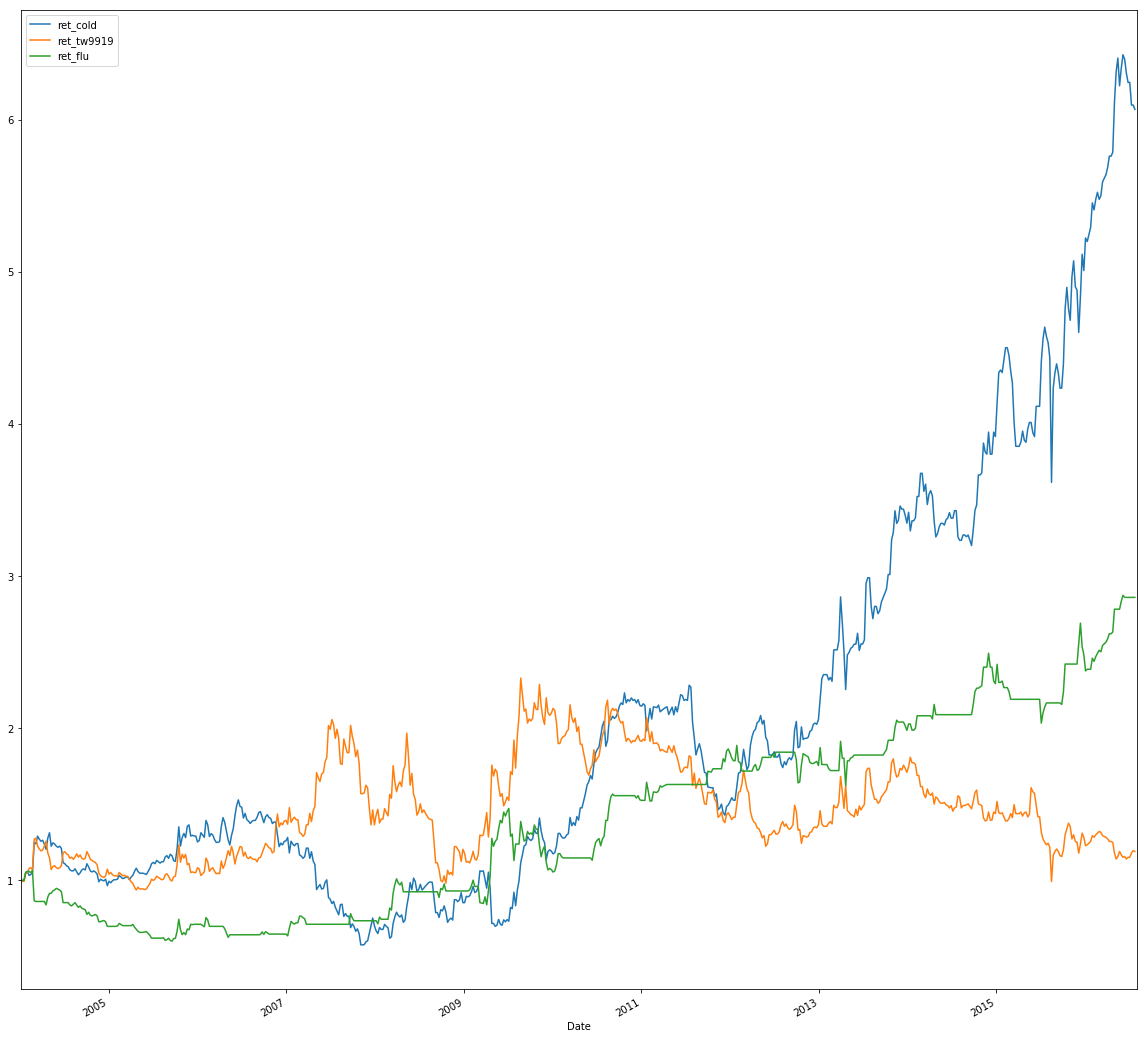

In [21]:
(1 + data.ret_cold).cumprod().plot(legend=True, figsize=[20,20])
(1 + data.ret_tw9919).cumprod().plot(legend=True)
(1 + data.ret_flu).cumprod().plot(legend=True)